<a href="https://colab.research.google.com/github/Santanukolkata/Data_Science/blob/master/Classification_Metrics/Regression_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.svm import SVR
from  sklearn.datasets import  load_boston   
data=   load_boston() 

In [ ]:
SV=SVR()

In [ ]:
X=load_boston().data
y=load_boston().target

In [ ]:
model_svr=SV.fit(X,y)

In [25]:
X.shape[1]

13

In [ ]:
Pred_y=SV.predict(X)

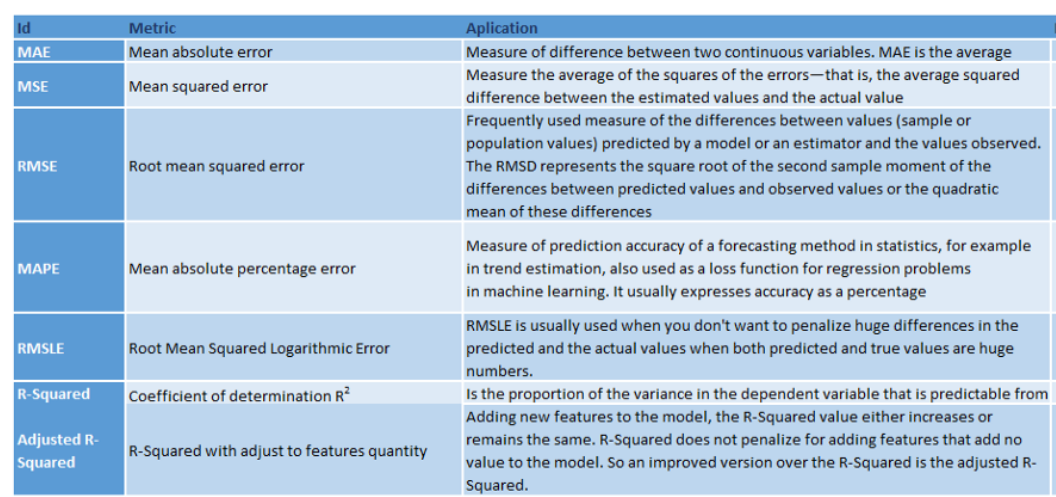![alt text](https://)

In [16]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
print ('Sk MAE: ' + str(mean_absolute_error(y,Pred_y)) )
def MAE(predict,target):
    return (abs(predict-target)).mean()
print ('My MAE: ' + str(MAE(Pred_y,y)))

Sk MAE: 5.259867611306851
My MAE: 5.259867611306851


In [17]:
# Mean square Error
from sklearn.metrics import mean_squared_error
print ('Sk MSE: ' + str(mean_squared_error(y,Pred_y)) )
def MSE(predict,target):
    return ((predict-target)**2).mean()
print ('My MSE: ' + str(MSE(Pred_y,y)) )

Sk MSE: 66.81823779202165
My MSE: 66.81823779202165


In [19]:
#RMSE: Root mean square error
#RMSE is a quadratic scoring rule that also measures the average magnitude of the error. 
#It’s the square root of the average of squared differences between prediction and actual observation.
import numpy as np
def RMSE(predict, target):
    return np.sqrt(((predict - target) ** 2).mean())
print ('My RMSE: ' + str(RMSE(Pred_y,y)) )

My RMSE: 8.174242337490469


## MAPE: Mean absolute percentage error
Measure of prediction accuracy of a forecasting method in statistics, for example in trend estimation, also used as a loss function for regression problems in machine learning. It usually expresses accuracy as a percentage.
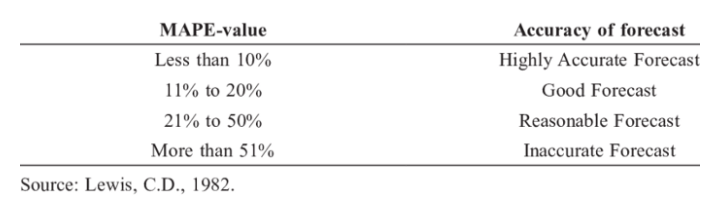

In [20]:
def MAPE(predict,target):
    return ( abs((target - predict) / target).mean()) * 100
print ('My MAPE: ' + str(MAPE(Pred_y,y)) )

My MAPE: 23.348190494330307


#RMSLE: Root Mean Squared Logarithmic Error
In case of RMSLE, you take the log of the predictions and actual values. So basically, what changes is the variance that you are measuring. I believe RMSLE is usually used when you don’t want to penalize huge differences in the predicted and the actual values when both predicted and true values are huge numbers.
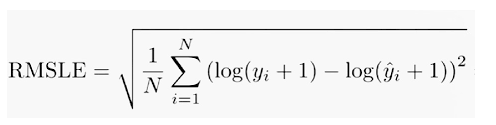

In [21]:
import math
def RMSLE(predict, target):
    total = 0 
    for k in range(len(predict)):
        LPred= np.log1p(predict[k]+1)
        LTarg = np.log1p(target[k] + 1)
        if not (math.isnan(LPred)) and  not (math.isnan(LTarg)): 
            total = total + ((LPred-LTarg) **2)
        
    total = total / len(predict)        
    return np.sqrt(total)
print ('My RMSLE: ' + str(RMSLE(Pred_y,y)) )

My RMSLE: 0.29657933145693854


In [23]:
def R2(predict, target):
    return 1 - (MAE(predict,target) / MAE(target.mean(),target))
def R_SQR(predict, target):
    r2 = R2(predict,target)
    return np.sqrt(r2)
print ('My R2         : ' + str(R2(Pred_y,y)) )
print ('My R          : ' + str(R_SQR(Pred_y,y)) )

My R2         : 0.20871017318480156
My R          : 0.4568480854559878


In [26]:
#adjusred R2
def R2_ADJ(predict, target, k):
    r2 = R2(predict,target)
    n = len(target)
    return (1 -  ( (1-r2) *  ( (n-1) / (n-(k+1)) ) ) )
k= X.shape[1]
print ('My R2 adjusted: ' + str(R2_ADJ(Pred_y,y,k)) )

My R2 adjusted: 0.1878021086551317
